<a href="https://colab.research.google.com/github/jahnavi1thoom/ensemble-learning-dateset/blob/main/KNN_cancerdataset%26ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [ ]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
dataset=pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [ ]:
#creating feature matrix
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
#training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=25,metric='minkowski')
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred=classifier.predict(x_test)
y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.])

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.956140350877193

<Axes: >

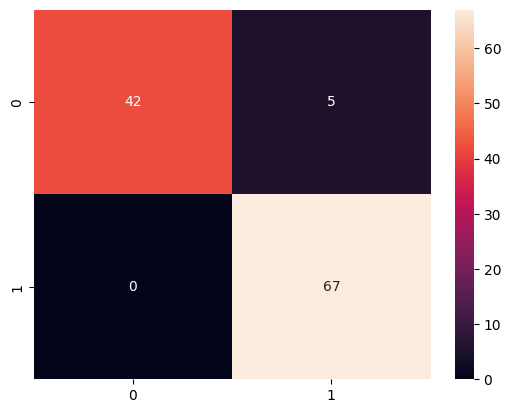

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
#dataset uplad
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/credit_risk_dataset.csv'
df=pd.read_csv(path)
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_emp_length,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0
cb_person_cred_hist_length,0
person_home_ownership_OTHER,0
person_home_ownership_OWN,0


In [ ]:
numerical_cols_to_scale = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'loan_status' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('loan_status')

print("Numerical columns to scale:", numerical_cols_to_scale)

Numerical columns to scale: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [ ]:
#featur scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_numerical = scaler.fit_transform(df[numerical_cols_to_scale])
df_scaled_numerical = pd.DataFrame(df_scaled_numerical, columns=numerical_cols_to_scale, index=df.index)

# Update the original df with the scaled numerical columns
df[numerical_cols_to_scale] = df_scaled_numerical

print("Numerical columns scaled successfully.")
df.head()

Numerical columns scaled successfully.


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,-0.903374,-0.107489,28.935738,4.019404,1.625251,1,3.931411,-0.691554,False,False,...,False,True,False,False,False,True,False,False,False,True
1,-1.060904,-1.660471,0.051481,-1.358650,0.041636,0,-0.657458,-0.938167,False,True,...,False,False,False,True,False,False,False,False,False,False
2,-0.430783,-1.660471,-0.927646,-0.646849,0.603041,1,3.744110,-0.691554,False,False,...,True,False,False,False,True,False,False,False,False,False
3,-0.745843,0.096850,-0.193301,4.019404,1.368887,1,3.369508,-0.938167,False,False,...,True,False,False,False,True,False,False,False,False,False
4,-0.588313,-0.252099,0.785826,4.019404,1.057357,1,3.556809,-0.444942,False,False,...,True,False,False,False,True,False,False,False,False,True


In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

print("Features (X) and target (y) separated successfully.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Features (X) and target (y) separated successfully.
Shape of X: (32581, 22)
Shape of y: (32581,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier object with n_neighbors=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

print("K-Nearest Neighbors classifier initialized successfully with n_neighbors=5.")

K-Nearest Neighbors classifier initialized successfully with n_neighbors=5.


In [ ]:
knn_classifier.fit(X_train, y_train)

print("K-Nearest Neighbors model trained successfully.")

K-Nearest Neighbors model trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8849163725640632

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[4961,  111],
       [ 639,  806]])

HYPERPARAMETERS

In [ ]:
#creating random forest classifier
from sklearn.ensemble import RandomForestClassifier
#load the model
model=RandomForestClassifier()
#define the parameteer grid
best_params={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(estimator=model,
                         param_grid=best_params,
                         scoring='accuracy',
                         n_jobs=-1,
                         cv=5,
                         verbose=2
                         )
#train the model using grid search
grid_search.fit(x_train,y_train)

#get best parametrs
best_parameters=grid_search.best_params_
print("best parameters",best_parameters)

#get best score
best_score=grid_search.best_score_
print("best score",best_score)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
439 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

best parameters {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
best score 0.9626373626373628


In [ ]:
#randomsearchcv library
from sklearn.model_selection import RandomizedSearchCV
#load the model
random_search=RandomizedSearchCV(estimator=model,
                         param_distributions=best_params,
                         scoring='accuracy',
                         n_jobs=-1,
                         cv=5,
                         verbose=2
                         )

#train the model
random_search.fit(x_train,y_train)
#get the best parameters
best_parameters=random_search.best_params_
print("best parameters",best_parameters)

#get best score
best_score=random_search.best_score_
print("best score",best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_p

best parameters {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
best score 0.9516483516483516


Ensemble Learning

Ada Boosting

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Social_Network_Ads.csv'
df=pd.read_csv(path)
df.head()

Mounted at /content/drive


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [ ]:
#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_model=DecisionTreeClassifier(max_depth=1)
classifier=AdaBoostClassifier(
    estimator=base_model,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
classifier.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

accuracy: 0.8875


Text(0.5, 1.0, 'Confusion Matrix')

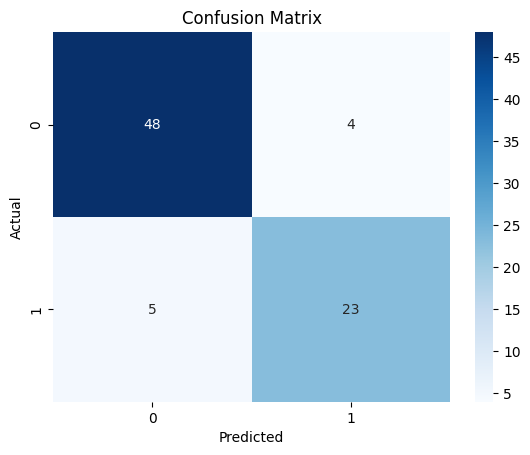

In [ ]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,y_pred))
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
#gradient model
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
)
classifier.fit(x_train,y_train)


GradientBoostingClassifier()

accuracy: 0.8625


Text(0.5, 1.0, 'Confusion Matrix')

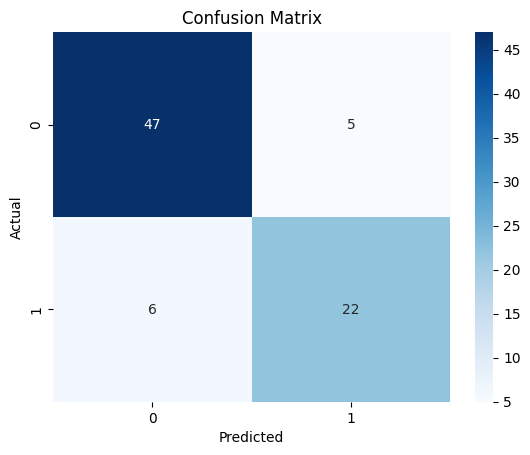

In [ ]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,y_pred))
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
#XGBoosting
from xgboost import XGBClassifier
classifier=XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8

)
classifier.fit(x_train,y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

accuracy: 0.925


Text(0.5, 1.0, 'Confusion Matrix')

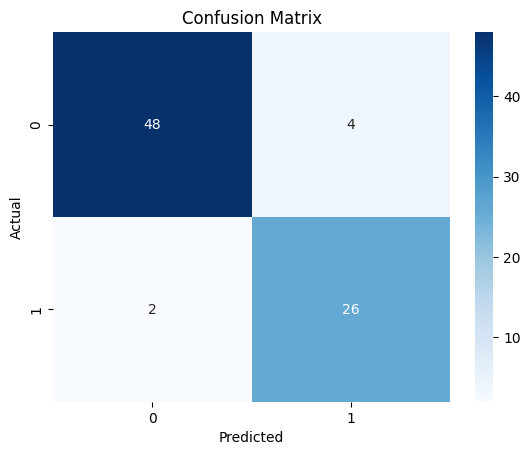

In [ ]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,y_pred))
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['Churn'].value_counts()


,count
Churn,
0,5163
1,1869


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = df.drop("customerID", axis=1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

X = df.drop("Churn", axis=1)
y = df["Churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy,cm

(0.7640369580668088,
 array([[884, 149],
        [183, 191]]))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, f1_score

gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [ ]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)


accuracy_gb


0.7896233120113717

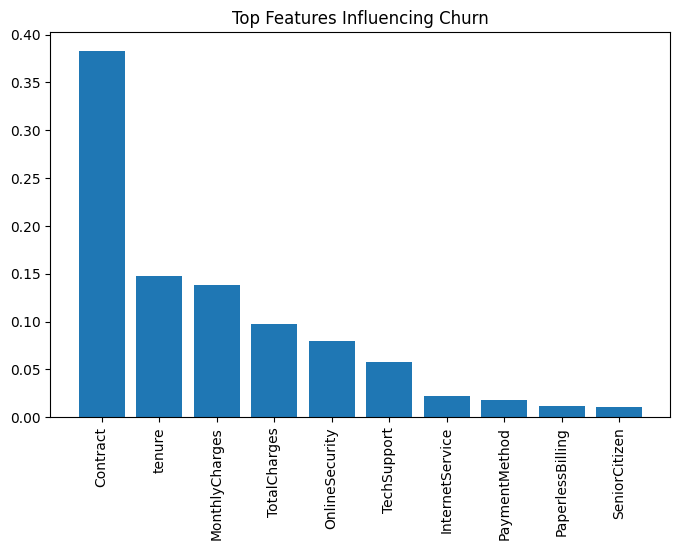

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importance = gb.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(10), importance[indices][:10])
plt.xticks(range(10), X.columns[indices][:10], rotation=90)
plt.title("Top Features Influencing Churn")
plt.show()


**Stacking_Ensemble learning**

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Social_Network_Ads.csv'
df=pd.read_csv(path)
df.head()

Mounted at /content/drive


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
#data preprocessing
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [13]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [14]:
#traing the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
#standardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
Define base model

In [16]:
base_model=[
    ('lr',LogisticRegression()),
    ('dt',DecisionTreeClassifier()),
    ('knn',KNeighborsClassifier())
]


MetaModel

In [17]:
meta_model=LogisticRegression()

Build stacking classifier

In [18]:
classifier=StackingClassifier(
    estimators=base_model,
    final_estimator=meta_model,
    cv=5
)
classifier.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

accuracy: 0.9
confusion matrix: [[47  5]
 [ 3 25]]


<Axes: >

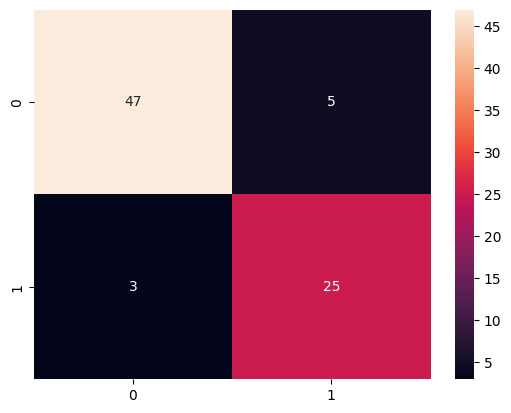

In [20]:
#prediction
y_pred=classifier.predict(x_test)
#accuracy
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:",cm)
sns.heatmap(cm,annot=True)

Assignment -loan dataset


In [21]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv'
df=pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
#data preprocessing
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
#handling the numerical missing values
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [46]:
#handling categorical missing values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Education']=le.fit_transform(df['Education'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [29]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
 13  Lon_Amount_Term    614 non-null    float64
dtypes: float64(5), int64(8), object(1)
memory usage: 67.3+ KB


In [58]:
df.drop('Loan_ID',axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Lon_Amount_Term
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,360.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,360.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,360.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,360.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,360.0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,180.0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,360.0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,360.0


In [63]:
#feature selection
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [64]:
#training the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
x_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Lon_Amount_Term'],
      dtype='object')

In [66]:
x_train = x_train.drop("Loan_ID", axis=1)
x_test = x_test.drop("Loan_ID", axis=1)


In [72]:
import numpy as np

np.isnan(x_train).sum()


np.int64(12)

In [73]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [74]:
import numpy as np
np.isnan(x_train).sum()

np.int64(0)

In [75]:
#standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Base_model

In [77]:
base_model=[
    ('lr',LogisticRegression()),
    ('dt',DecisionTreeClassifier()),
    ('knn',KNeighborsClassifier()),
    ('rf',RandomForestClassifier()),
    ('svc',SVC())
]

meta_model

In [78]:
meta_model=LogisticRegression()

In [79]:
import numpy as np
classifier=StackingClassifier(
    estimators=base_model,
    final_estimator=meta_model,
    cv=5
)
classifier.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('svc', SVC())],
                   final_estimator=LogisticRegression())

In [80]:
#accuracy
y_pred=classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:",cm)

accuracy: 0.7804878048780488
confusion matrix: [[18 25]
 [ 2 78]]
